In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint.csv'
model_save_path = 'model/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 26

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │             286 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,356 (5.30 KB)

 Trainable params: 1,356 (5.30 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=2000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/2000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 8s 932ms/step - accuracy: 0.0469 - loss: 3.3011
Epoch 1: saving model to model/keypoint_classifier.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0466 - loss: 3.3150 - val_accuracy: 0.0411 - val_loss: 3.2653
Epoch 2/2000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0391 - loss: 3.3136
Epoch 2: saving model to model/keypoint_classifier.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0449 - loss: 3.3036 - val_accuracy: 0.0217 - val_loss: 3.2469
Epoch 3/2000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0234 - loss: 3.2530
Epoch 3: saving model to model/keypoint_classifier.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0436 - loss: 3.2694 - val_accuracy: 0.0628 - val_loss: 3.2393
Epoch 4/2000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0391 - loss: 3.2435
Epoch 4: saving model to model/keypoint_classifier.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0414 - loss: 3.2602 -

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6286 - loss: 1.3240 


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[1.4081178e-03 2.9083610e-01 5.9633192e-02 4.4147335e-02 9.5577847e-04
 9.3030870e-02 1.4854511e-02 1.1539878e-02 1.3247410e-05 2.7378130e-07
 1.9568838e-04 7.6460058e-04 1.6821387e-04 1.8199154e-06 1.1246967e-02
 5.7409285e-05 2.5216990e-05 1.5351322e-01 7.2066480e-04 2.3904661e-08
 2.9166616e-03 1.2386806e-03 3.1046933e-01 1.7997425e-03 1.1534981e-08
 4.6238379e-04]
22


# Confusion matrix

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


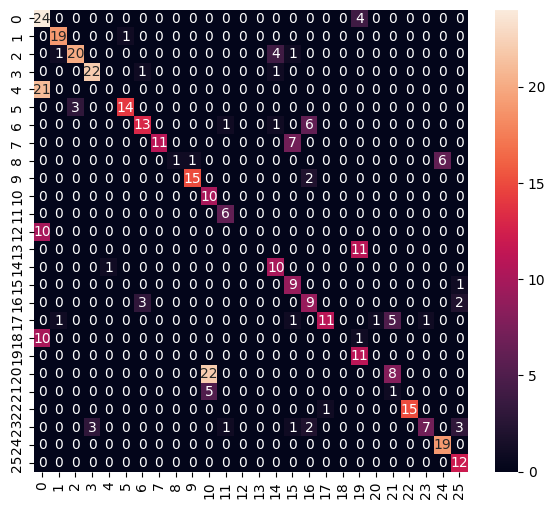

Classification Report
              precision    recall  f1-score   support

           0       0.37      0.86      0.52        28
           1       0.90      0.95      0.93        20
           2       0.87      0.77      0.82        26
           3       0.88      0.92      0.90        24
           4       0.00      0.00      0.00        21
           5       0.93      0.82      0.88        17
           6       0.76      0.62      0.68        21
           7       1.00      0.61      0.76        18
           8       1.00      0.12      0.22         8
           9       0.94      0.88      0.91        17
          10       0.27      1.00      0.43        10
          11       0.75      1.00      0.86         6
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00        11
          14       0.62      0.91      0.74        11
          15       0.47      0.90      0.62        10
          16       0.47      0.64      0.55        14
     

C:\Users\chira\OneDrive\Desktop\Coding Projects\Hand Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\chira\OneDrive\Desktop\Coding Projects\Hand Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\chira\OneDrive\Desktop\Coding Projects\Hand Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\chira\AppData\Local\Temp\tmphgpde5vx\assets


INFO:tensorflow:Assets written to: C:\Users\chira\AppData\Local\Temp\tmphgpde5vx\assets


Saved artifact at 'C:\Users\chira\AppData\Local\Temp\tmphgpde5vx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  1882445928528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1882445929872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1882445934288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1882445929488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1882445926032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1882445931984: TensorSpec(shape=(), dtype=tf.resource, name=None)


7524

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

C:\Users\chira\OneDrive\Desktop\Coding Projects\Hand Detection\venv\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 995 μs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.40811806e-03 2.90836155e-01 5.96332140e-02 4.41473462e-02
 9.55778640e-04 9.30308849e-02 1.48545168e-02 1.15398765e-02
 1.32474051e-05 2.73782007e-07 1.95688306e-04 7.64601049e-04
 1.68213985e-04 1.81991823e-06 1.12469699e-02 5.74093756e-05
 2.52170048e-05 1.53513238e-01 7.20664975e-04 2.39046525e-08
 2.91666063e-03 1.23868149e-03 3.10469240e-01 1.79974281e-03
 1.15349765e-08 4.62384109e-04]
22
